In [111]:
import folium
import pandas as pd
from lat_lon_parser import parse
import ast
import geopandas as gpd
import matplotlib.pyplot as plt

# # Define the coordinates of each point in the list
# coordinates = [
#     (40.712776, -74.005974),
#     (34.052235, -118.243683),
#     (41.878114, -87.629798),
#     (37.774929, -122.419416),
#     (42.360081, -71.058884),
#     (39.952583, -75.165222),
#     (29.760427, -95.369804)
# ]

# # Define the coordinate of the destination point
# destination = (51.5074, -0.1278)

# # Create a map centered on the destination point
# map = folium.Map(location=destination, zoom_start=3)

# # Add markers for each point in the list
# for coord in coordinates:
#     folium.Marker(location=coord).add_to(map)
#     folium.PolyLine(locations=[destination, coord], color='blue').add_to(map)





In [112]:
def import_from_excel_col(file_path, sheet_name, reference_col='weights_gdp'):
    df = pd.read_excel(file_path, sheet_name=sheet_name)
    values = df[reference_col].tolist()
    return values

def coordinate_loader(file_name, country, coordinate_reference = 'coordinates'):
    coords_list = []
    coords_list = import_from_excel_col(file_name, sheet_name=country, reference_col=coordinate_reference)
    latitudes, longitudes = parse_coordinates(coords_list=coords_list)
    latitudes_degrees, longitudes_degrees = coords_converter(latitudes=latitudes, longitudes=longitudes)
    coordinates = list(zip(latitudes_degrees, longitudes_degrees))
    return coordinates

def retrieve_wgm(file_name, country_name):
    wgms_list = import_from_excel_col(file_path=file_name, sheet_name='output', reference_col='wgm')
    country_list = import_from_excel_col(file_path=file_name, sheet_name='output', reference_col='country')
    match = None
    counter = 0
    for element in country_list:
        if element == country_name:
            match = element
            break
        counter += 1
    wgm = wgms_list[counter]
    return wgm

def parse_coordinates(coords_list):
    north_south = []
    east_west = []
    for coord in coords_list:
        lat, lon = coord.split()
        if "N" in lat:
            north_south.append(lat)
        elif "S" in lat:
            north_south.append(lat)
        else:
            raise ValueError(f"Invalid latitude format: {lat}")
        
        if "E" in lon:
            east_west.append(lon)
        elif "W" in lon:
            east_west.append(lon)
        else:
            raise ValueError(f"Invalid longitude format: {lon}")
        
    return north_south, east_west

def coords_converter(latitudes, longitudes):
    output_lats = []
    output_lons = []
    for lat in latitudes:
        tmp = parse(lat)
        output_lats.append(tmp)

    for lon in longitudes:
        tmp = parse(lon)
        output_lons.append(tmp)
    
    if len(output_lats) == len(output_lons):
        return output_lats, output_lons
    else: 
        print("coordinate lengths of latitudes in input list did not match length of longitudes")


def to_float_tuple(input):
    parsed_tuple = ast.literal_eval(input)
    float_tuple = tuple(float(x) for x in parsed_tuple)
    return float_tuple

def draw_html_map_from_excel(file_path, country):
    coordinates = coordinate_loader(file_name=file_path, country=country)
    destination = retrieve_wgm(file_name='output.xlsx', country_name=country)
    destination = to_float_tuple(destination)
    map = folium.Map(location=destination, zoom_start=3)
    for coord in coordinates:
        #folium.Marker(location=coord).add_to(map)
        folium.Marker(location=destination, icon=folium.Icon(color='red')).add_to(map)
        folium.PolyLine(locations=[destination, coord], color='blue').add_to(map)
    return map

def draw_map_from_excel(file_path, country, ax=None, xmin=None, ymin=None, xmax=None, ymax=None):
    coordinates = coordinate_loader(file_name=file_path, country=country)
    destination = retrieve_wgm(file_name='output.xlsx', country_name=country)
    destination = to_float_tuple(destination)

    # Load the shapefile for the country borders
    shapefile_path = 'shapefiles/ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp'
    country_borders = gpd.read_file(shapefile_path)

    # Plot the country borders
    if ax is None:
        fig, ax = plt.subplots(figsize=(8, 6))
        country_borders.plot(ax=ax, color='none', edgecolor='black')
    else:
        country_borders.plot(ax=ax, color='none', edgecolor='black')

    # Plot a line connecting each coordinate to the destination
    for coord in coordinates:
        xs, ys = [destination[1], coord[1]], [destination[0], coord[0]]
        ax.plot(xs, ys, color='blue', linewidth=1)

        # Plot each coordinate as a blue circle
        ax.plot(coord[1], coord[0], marker='o', color='blue', markersize=5)

    # Plot the destination as a red star marker
    ax.plot(destination[1], destination[0], marker='*', color='red', markersize=20)

    # Set the x and y limits based on the coordinates and optional arguments
    xvals = [c[1] for c in coordinates] + [destination[1]]
    yvals = [c[0] for c in coordinates] + [destination[0]]
    if xmin is not None:
        min_x = xmin
    else:
        min_x = min(xvals) -10
    if xmax is not None:
        max_x = xmax
    else:
        max_x = max(xvals) +10
    if ymin is not None:
        min_y = ymin
    else:
        min_y = min(yvals) -10
    if ymax is not None:
        max_y = ymax
    else:
        max_y = max(yvals) +10
    ax.set_xlim(min_x, max_x)
    ax.set_ylim(min_y, max_y)

    # Set the title and axis labels
    ax.set_title(country)
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')


In [113]:
filename = 'data.xlsx'
country = 'germany'

draw_html_map_from_excel(filename, country)

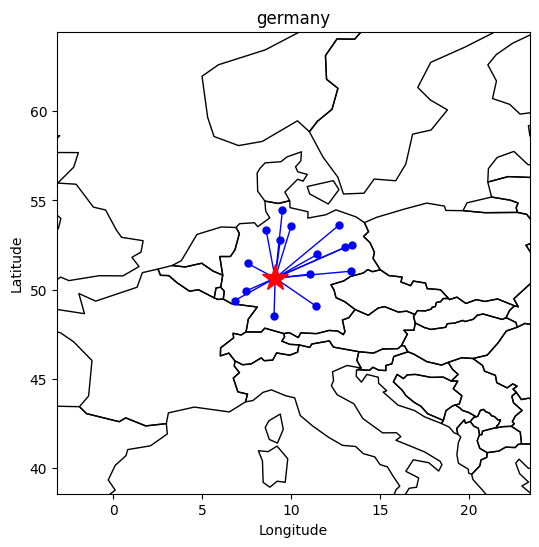

In [114]:
draw_map_from_excel(filename, country)

['colombia', 'china', 'russia', 'poland', 'indonesia', 'south_africa', 'india', 'usa', 'kazakhstan', 'australia']


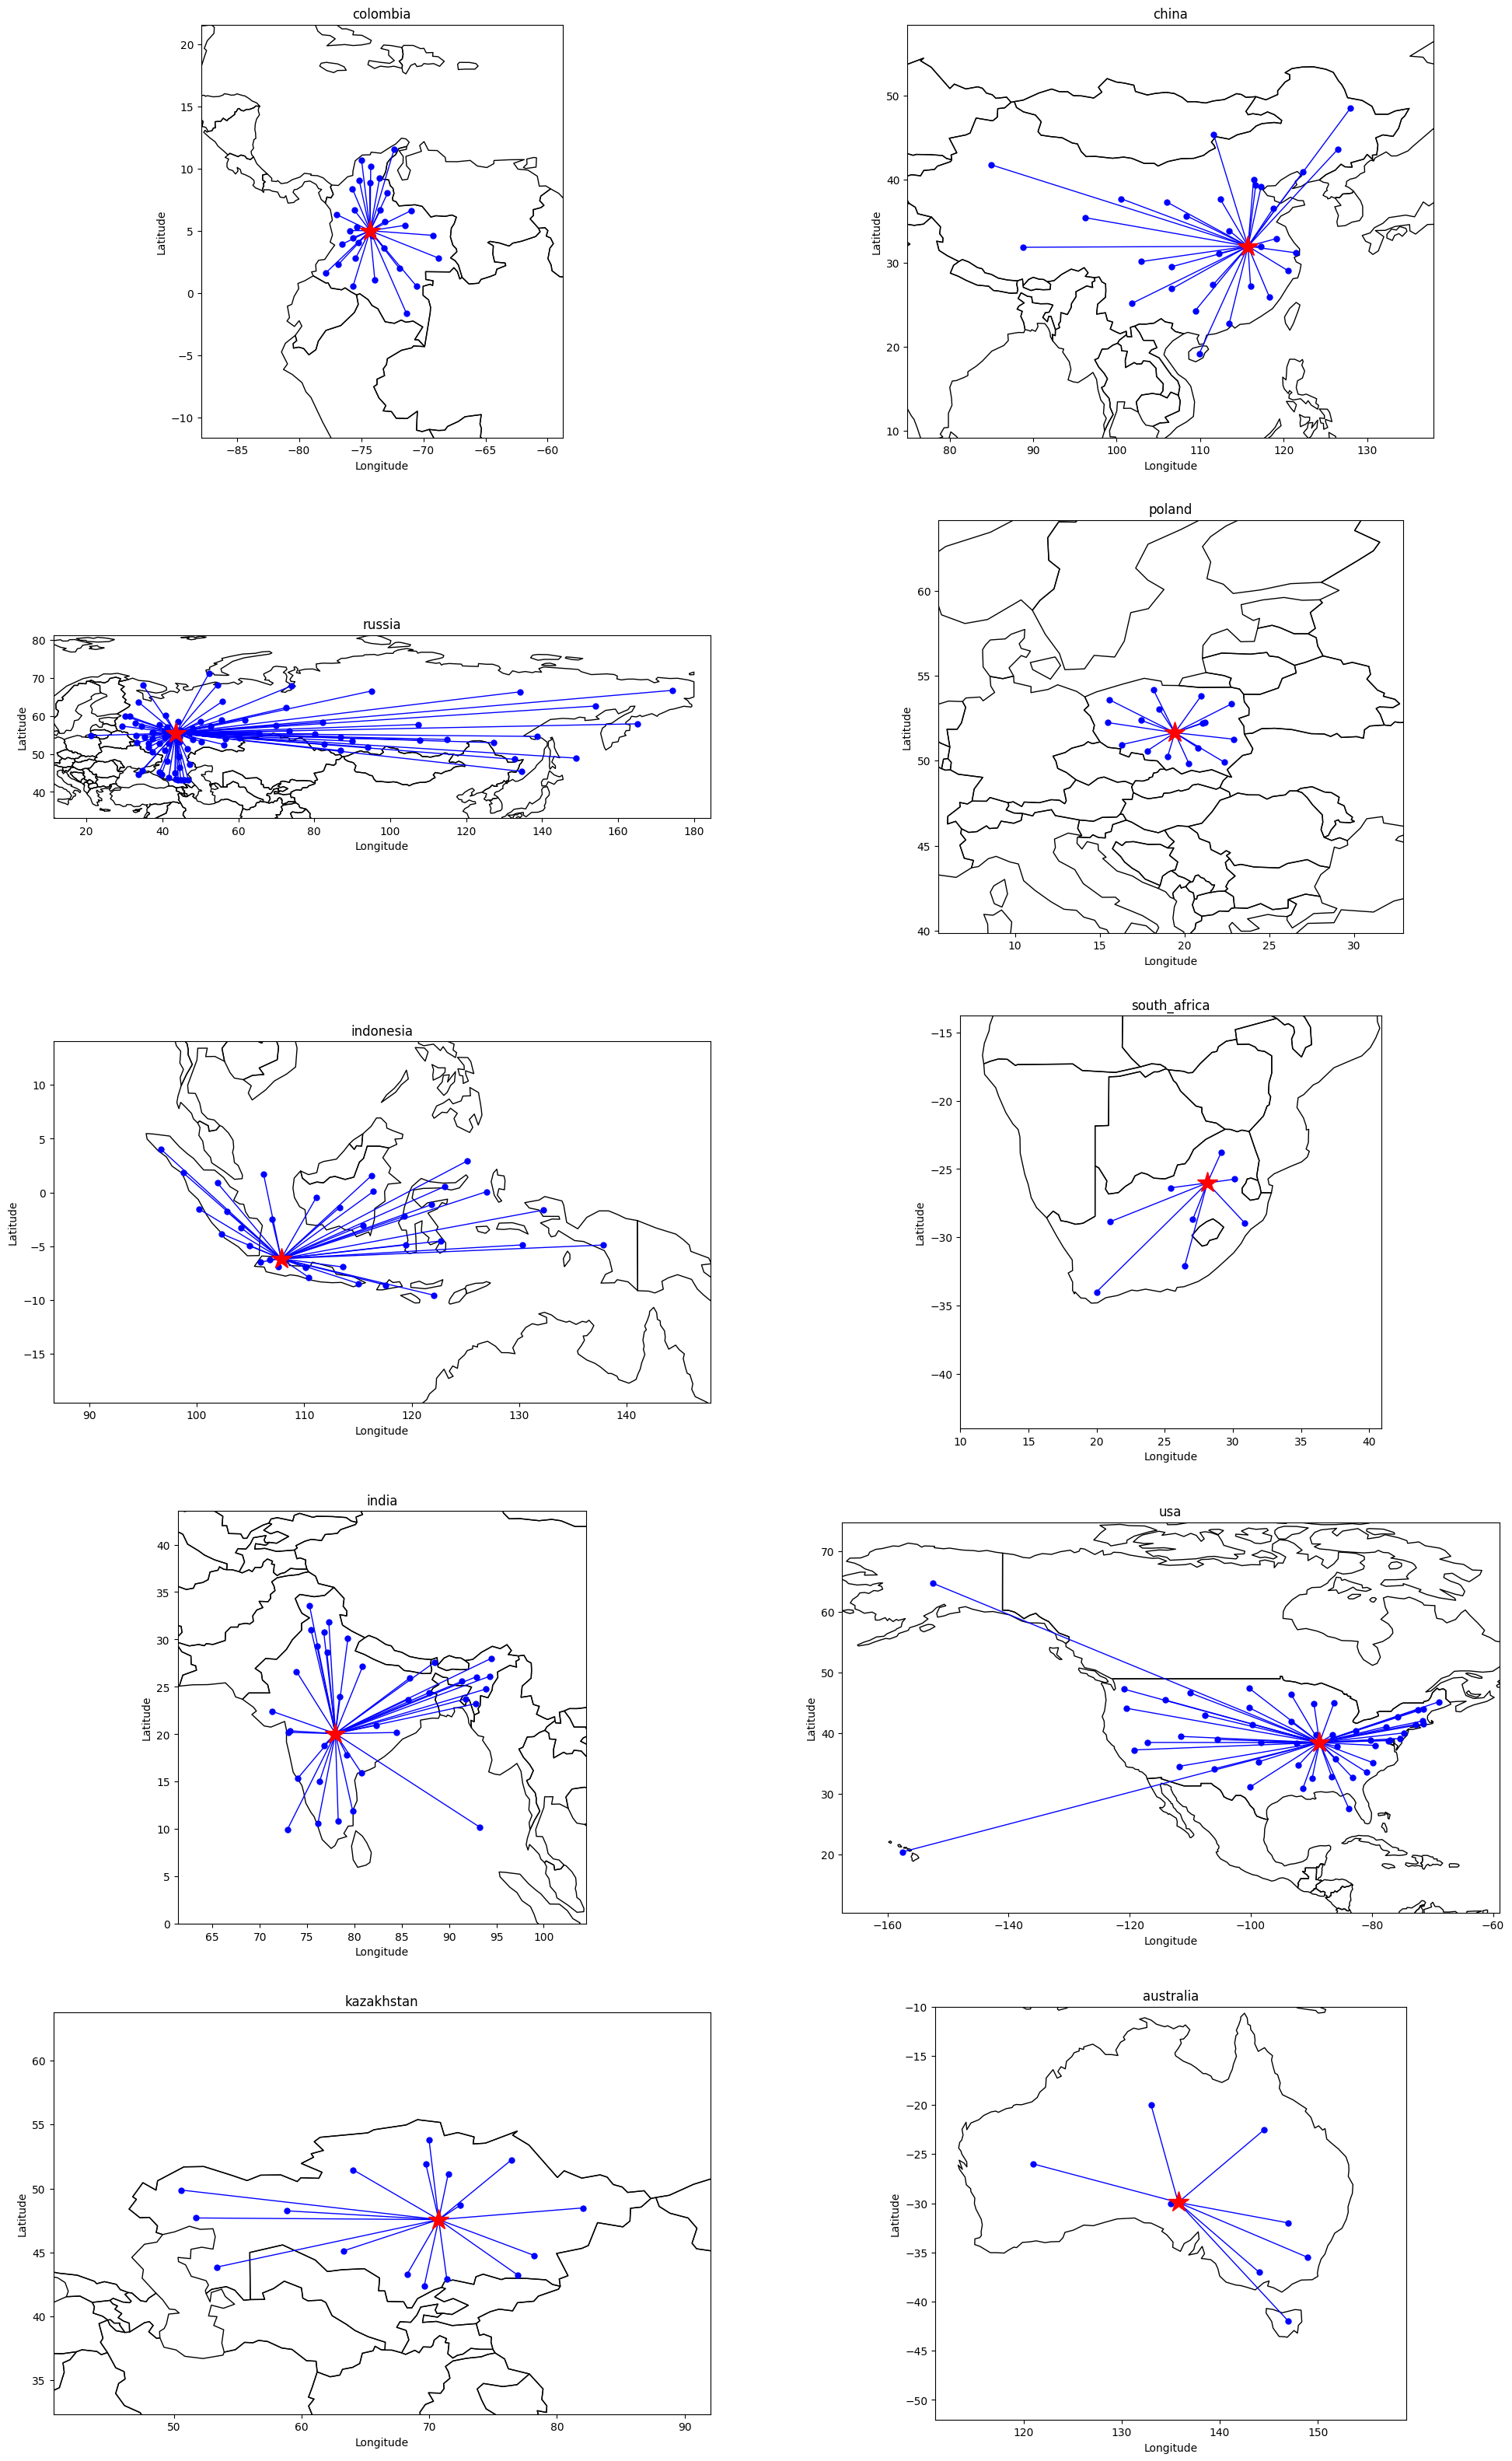

In [115]:
# List of country names
countries_all = import_from_excel_col('data.xlsx', sheet_name='country_list', reference_col='countries')
countries = ['colombia', 'china', 'russia', 'poland', 'indonesia', 'south_africa', 'india', 'usa', 'kazakhstan', 'australia']
print(countries)

# Create a Matplotlib figure with 5 rows and 2 columns
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(24, 40))

# Loop over the countries and draw a map for each one
for i, country in enumerate(countries):
    # Calculate the row and column indices for this map
    row = i // 2
    col = i % 2

    # Create a new axis for this map
    ax = axs[row, col]

    # Call the draw_map_from_excel2 function and pass the current axis
    draw_map_from_excel(filename, country=country, ax=ax)

    # Set the title for this map
    ax.set_title(country)

# Save the figure as a PNG image
plt.savefig('ten_maps.png')

